In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

# Bước 1: Import data



In [278]:
df = pd.read_excel('OneBank.xlsx')

In [279]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  object 
 11  churn             10000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 937.6+ KB


# Bước 2: Data Cleaning

< thực hiện bước 2 khi dữ liệu của bạn chưa sạch: bao gồm dọn dẹp, định dạng lại, xử lý duplicated, xử lý null: mean nếu nhãn là dữ liệu liên tục, mode nếu nhãn nếu dữ liệu rời rạc,.....>

In [281]:
#kiểm tra null
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [282]:
#kiểm tra dupicated
df.duplicated().sum()

0

In [283]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['country',
 'gender',
 'tenure',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

In [284]:
# numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col != "customer_id"]
numeric_variables

['credit_score', 'age', 'balance']

### Ouliers

In [285]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [286]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
    outlier = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            outlier.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return outlier

In [287]:
for var in numeric_variables:
    print(var, "has" , len(has_outliers(df, [var])),  "outliers")

credit_score has 0 outliers
age has 0 outliers
balance has 0 outliers


### Feature engineering

In [288]:
# # we standardize tenure with age
df["NewTenure"] = df["tenure"]/df["age"]
df["NewCreditsScore"] = pd.qcut(df['credit_score'], 6, labels = [1, 2, 3, 4, 5, 6])
# df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
# df["NewBalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
# df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Bước 3: EDA data

< khi dữ liệu đã sạch rồi, bạn cần hiểu càng sâu về dữ liệu càng tốt bằng cách vẽ các biểu đồ mô tả, thống kê, phân phối, ma trận tương quan, phân tán,.... Sau khi đã hiểu sâu về dữ liệu hơn, bạn sẽ thực hiển số hóa và chuẩn hóa dữ liệu thành dạng nhị phân và dạng số để máy tính hiểu và giúp bạn xây dựng mô hình dự báo>

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  object  
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  int64   
 8   credit_card       10000 non-null  int64   
 9   active_member     10000 non-null  int64   
 10  estimated_salary  10000 non-null  object  
 11  churn             10000 non-null  int64   
 12  NewTenure         10000 non-null  float64 
 13  NewCreditsScore   10000 non-null  category
dtypes: category(1), float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [290]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'NewTenure', 'NewCreditsScore'],
      dtype='object')

In [291]:
df['estimated_salary'] = df['estimated_salary'].str.replace(r'\b\d{4}-\d{2}-\d{2} 00:00:00\b', 'nan' , regex=True)

In [292]:
df['estimated_salary'] = df['estimated_salary'].astype(float)

In [293]:
df['estimated_salary'].isna().sum()

199

In [294]:
df['estimated_salary'] = df.groupby(['age'])['estimated_salary'].transform(lambda x: x.fillna(x.mean()))

In [295]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
NewTenure           0
NewCreditsScore     0
dtype: int64

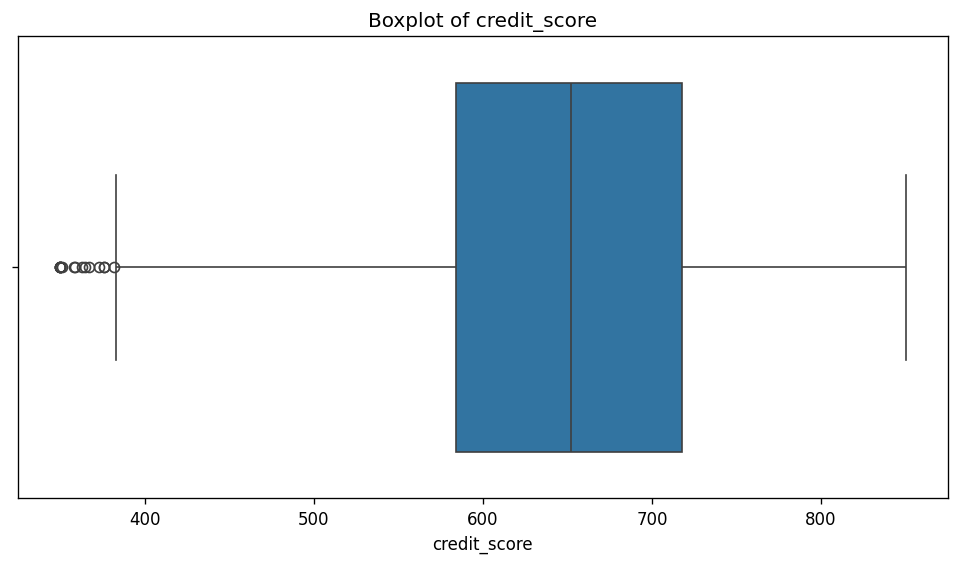

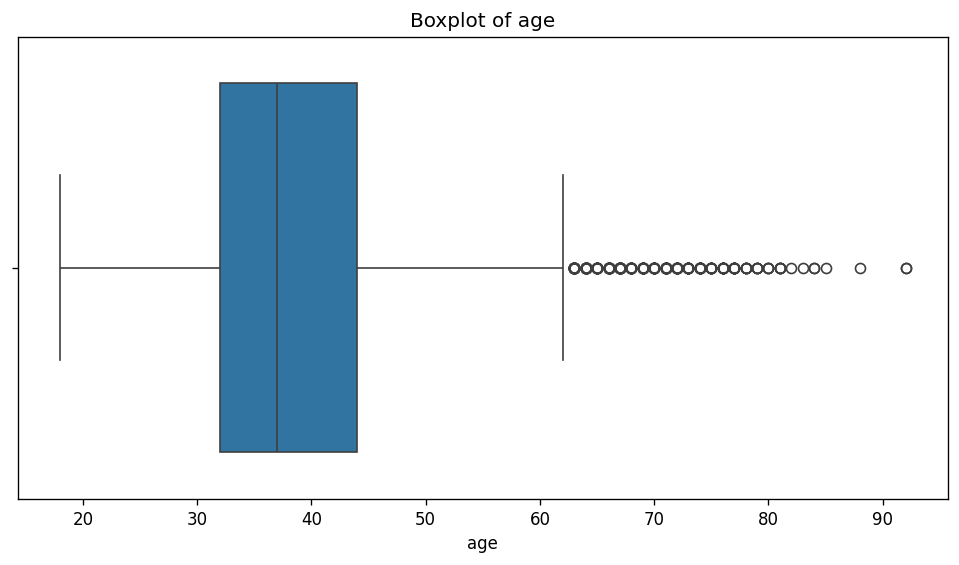

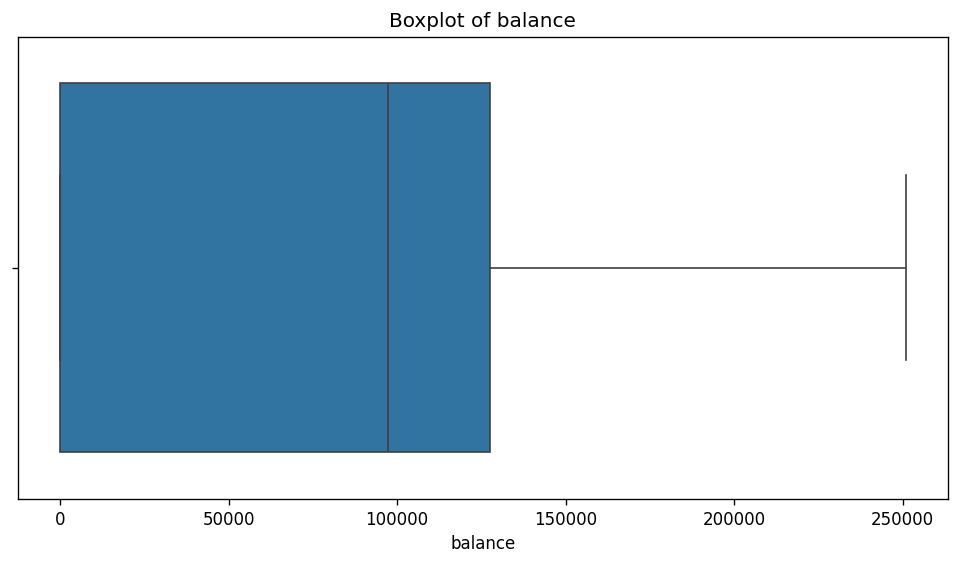

In [296]:
for var in numeric_variables:
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

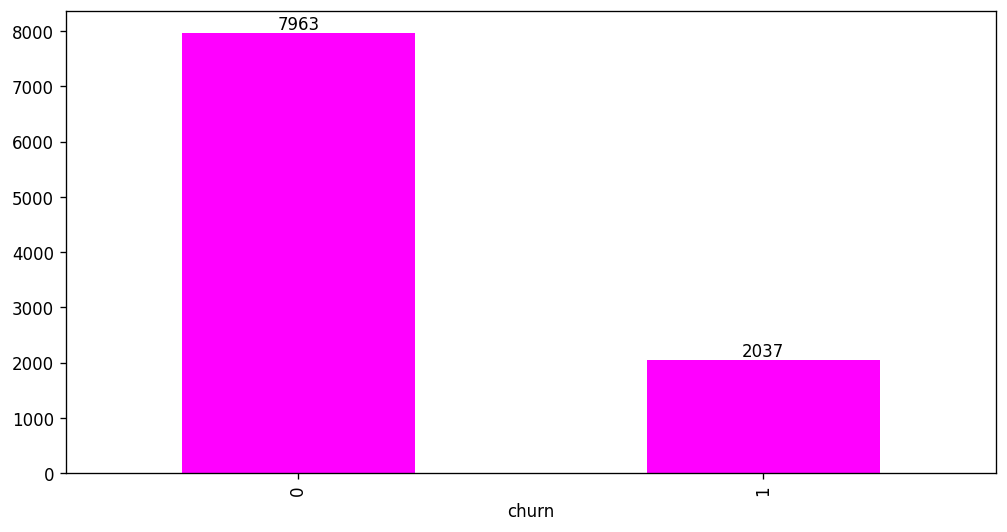

In [297]:
u = df['churn'].value_counts().plot(kind = 'bar', color = 'magenta')
for container in u.containers:
  u.bar_label(container)
plt.show()

In [298]:
df.select_dtypes(include='object')

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


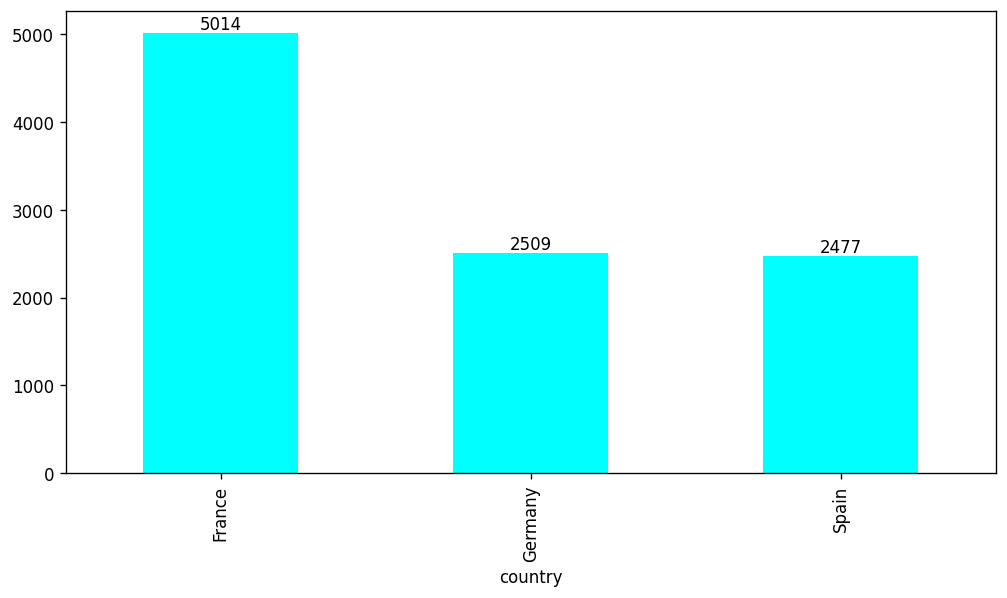

In [299]:
x = df['country'].value_counts().plot(kind = 'bar', color = 'cyan')
for container in x.containers:
  x.bar_label(container)
plt.show()

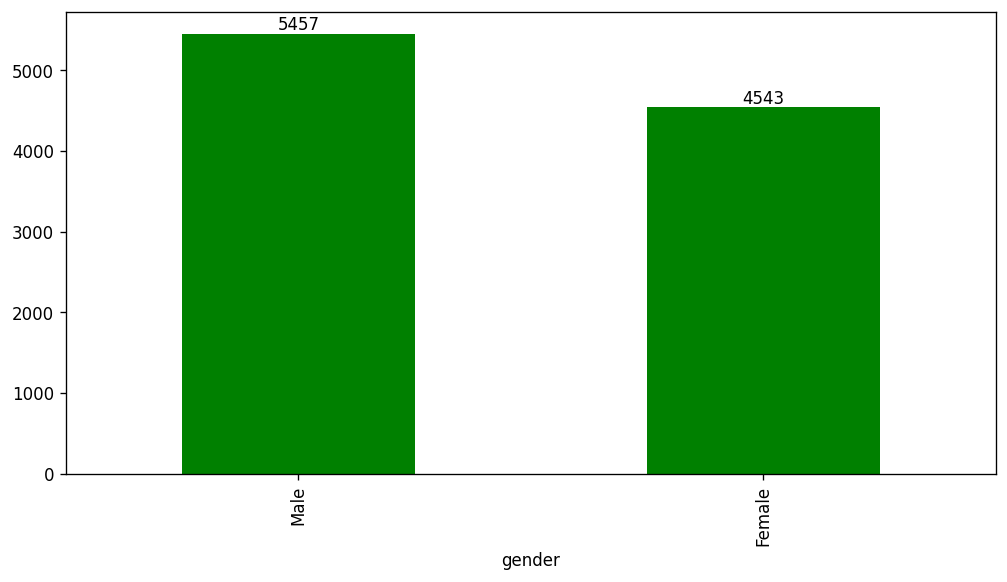

In [300]:
x = df['gender'].value_counts().plot(kind = 'bar', color = 'green')
for container in x.containers:
  x.bar_label(container)
plt.show()

In [301]:
df.select_dtypes(include='number').describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,NewTenure
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,101062.730471,0.203700,0.137936
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,56532.600989,0.402769,0.089506
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,53432.957500,0.000000,0.064516
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100924.390000,0.000000,0.129032
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,148955.820000,0.000000,0.200000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.555556


<Axes: >

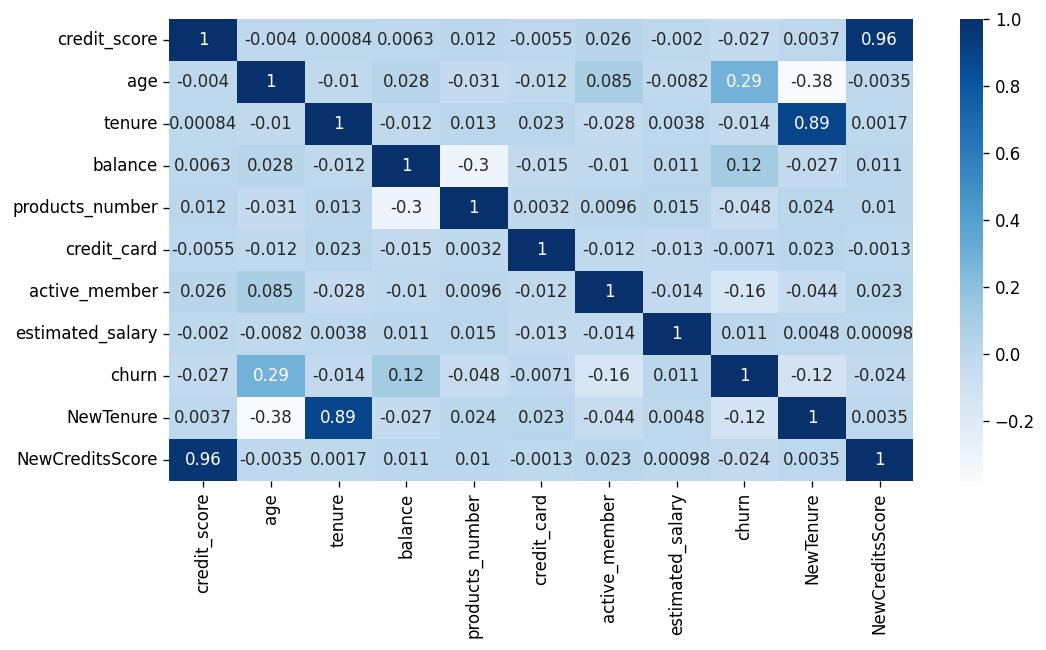

In [302]:
t = df.select_dtypes(exclude='object').drop('customer_id', axis = 1).corr()
sns.heatmap(t, annot = True, cmap = 'Blues')

<Axes: ylabel='Frequency'>

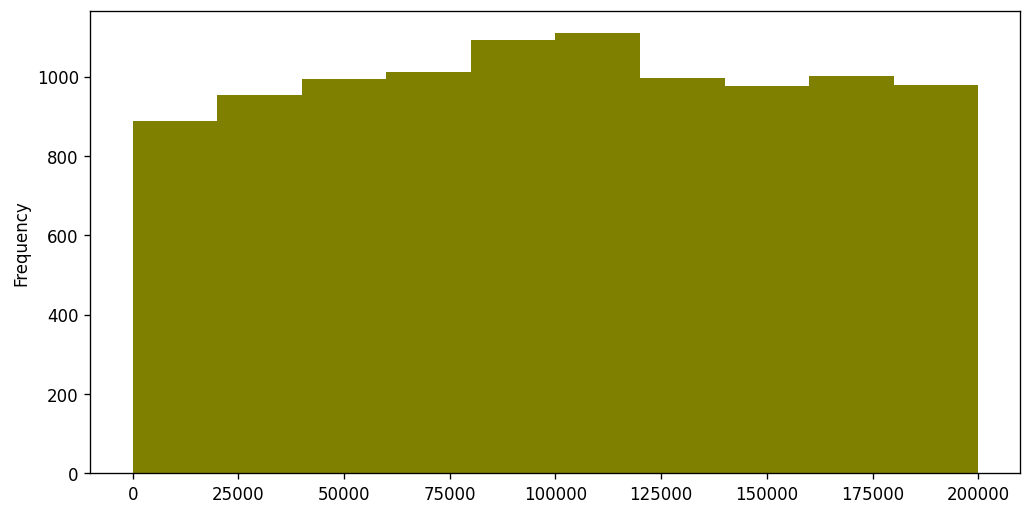

In [303]:
df['estimated_salary'].plot(kind ='hist', color = 'olive')

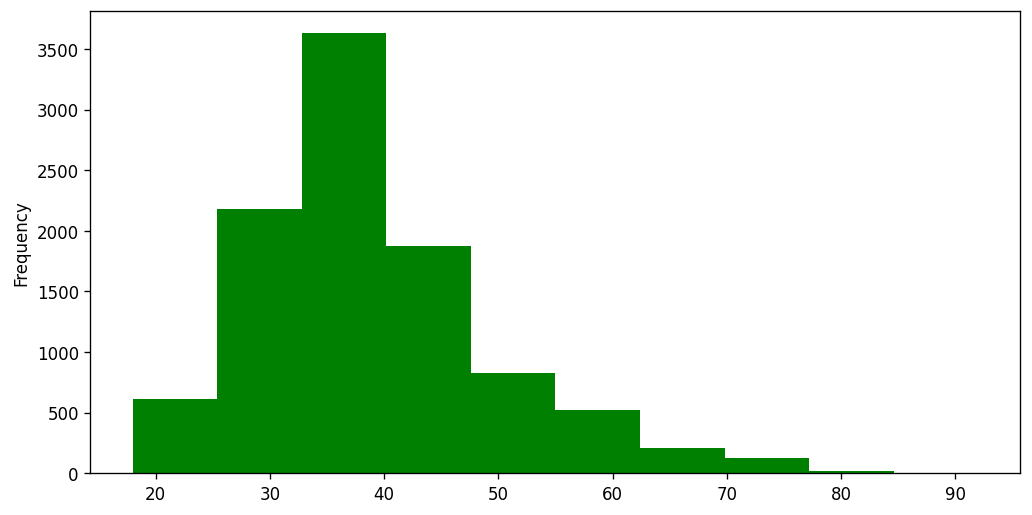

In [304]:
df['age'].plot(kind = 'hist', color = 'green');

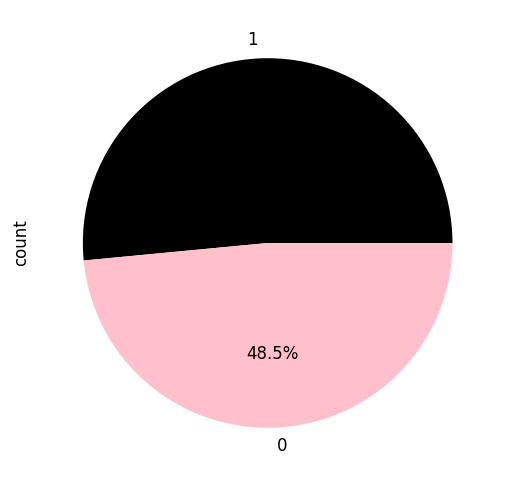

In [305]:
df['active_member'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['black', 'pink']);

In [306]:
#Encoder bằng onhot
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_one_array = ohe.fit_transform(df[['country', 'gender']]).toarray()
df_one = pd.DataFrame(df_one_array, columns = ohe.get_feature_names_out())
df_one
df.drop(['country', 'gender'], axis = 1, inplace = True)
df = pd.concat([df, df_one], axis = 1)
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,NewTenure,NewCreditsScore,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,1.0,0.0,0.0,1.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,0.0,0.0,1.0,1.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,1.0,0.0,0.0,1.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,1.0,0.0,0.0,1.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0.128205,6,1.0,0.0,0.0,0.0,1.0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0.285714,1,1.0,0.0,0.0,0.0,1.0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0.194444,5,1.0,0.0,0.0,1.0,0.0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0.071429,6,0.0,1.0,0.0,0.0,1.0


In [307]:
# df.to_csv('cleaned_data.csv', index=False)